# Fast Fourier Transform Algorithms
---
Discrete fourier transform plays an important role in the digital signal processing domain due to the development of computationally efficient algorithms.

## Cooley-Tukey

In [58]:
import matplotlib.pyplot as plt
import numpy as np

def fft(x):
    """Recursive FFT"""
    N = len(x)
    
    if N != 1:
        x_even = fft(x[::2])
        x_odd = fft(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        x =  np.concatenate([x_even + factor[:int(N/2)] * x_odd, x_even + factor[int(N/2)] * x_odd])
        
    return x

In [44]:
# Sampling rate
def generate_wf(sr):
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3 * np.sin(2 * np.pi * freq * t)

    freq = 4
    x += np.sin(2 * np.pi * freq * t)

    freq = 7
    x += 0.5 * np.sin(2 * np.pi * freq * t)
    
    return t, x, sr

In [45]:
def analyze_wf(N, n, T, freq):
    plt.figure(figsize = (8,6))
    plt.plot(t, x, 'r')
    plt.ylabel('Amplitude')
    plt.show()

In [57]:
def plot_wf(config):
    t, x, _ = config
    plt.figure(figsize = (8,6))
    plt.plot(t, x, 'r')
    plt.ylabel('Amplitude')
    plt.show()

In [50]:
def plot_analysis(config):
    _, x, sr = config
    X = fft(x)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T
    
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    plt.stem(freq, abs(X), linefmt='b', markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    
    # 1-sided spectrum
    n_oneside = N//2
    
    # 1-side freq
    f_oneside = freq[:n_oneside]
    
    # normalize
    x_oneside = X[:n_oneside]/n_oneside
    plt.subplot(122)
    plt.stem(f_oneside, abs(x_oneside), linefmt='b', markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Normalized FFT Amplitude |X(freq)|')
    plt.tight_layout()
    plt.show()

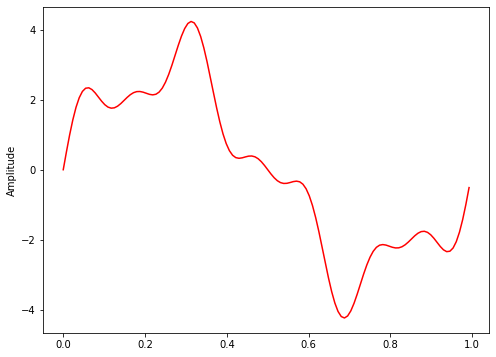

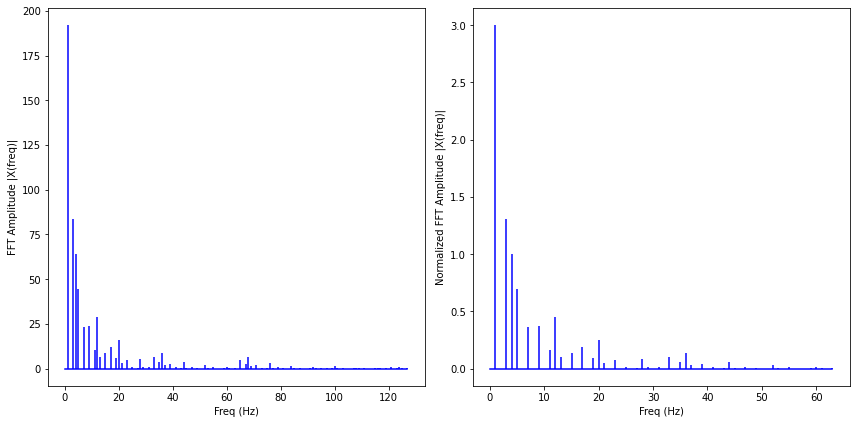

In [56]:
sr = 128
wf = generate_wf(sr)
plot_wf(wf)
plot_analysis(wf)

## Chirp-Z

In [3]:
# TODO

In [36]:
# import sys
# !{sys.executable} -m pip install --user numpy matplotlib